/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


training data points: 1212
validation data points: 135
testing data points: 450
k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.95      1.00      0.97        37
          2       1.00      1.00      1.00        38
          3       0.98      0.98      0.98        46
          4       0.98      0.98      0.98        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        41
          8       0.97      0.9

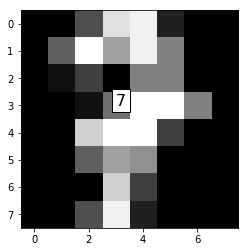

i think tha digit is : 2


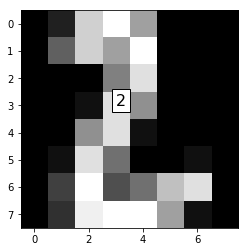

i think tha digit is : 4


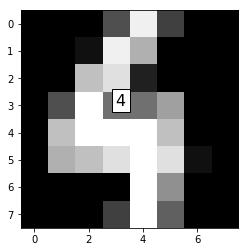

i think tha digit is : 6


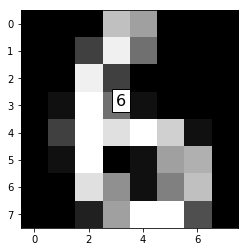

i think tha digit is : 6


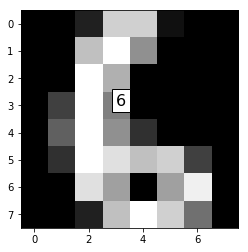

In [1]:

from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt
mnist = datasets.load_digits()
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))
kVals = range(1, 30, 2)
accuracies = []



for k in range(1, 30, 2):
         
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          


i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))


model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)




print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))



for i in np.random.randint(0, high=len(testLabels), size=(5,)):
        
         image = testData[i]
         prediction = model.predict([image])[0]
   
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("i think tha digit is : {}".format(prediction))
         plt.show()
         cv2.waitKey(0)